In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

### rand = Uniform distribution
![](data/16.png)

### randn = Normal distribution
![](data/17.png)

### Non linear distribution

In [49]:
rng = np.random.RandomState(0)

n_sample = 100
data_max, data_min = 1.4, -1.4
len_data = (data_max - data_min)
data = rng.rand(n_sample) * len_data -len_data /2
noise = rng.randn(n_sample) * .3
target = data**3 -0.5*data** 2 + noise

<AxesSubplot:xlabel='data', ylabel='target'>

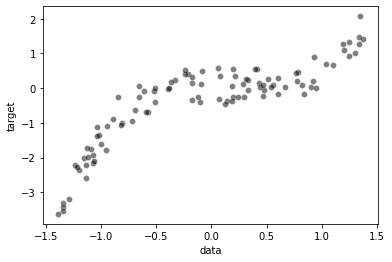

In [50]:
full_data = pd.DataFrame({"data" : data, "target" : target})

sns.scatterplot(x='data',y='target', data=full_data, color='black', alpha=0.5)


In [28]:
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()
data = pd.DataFrame(data)
target=pd.DataFrame(target)

model_linear.fit(data,target)


LinearRegression()

In [32]:
x_coef = model_linear.coef_
x_intercept = model_linear.intercept_

In [44]:
x_equ = x_coef* data + x_intercept

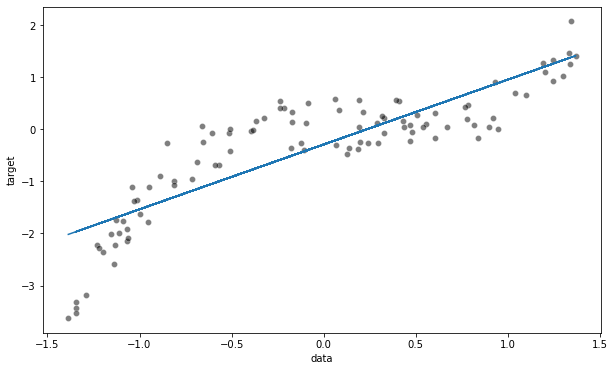

In [45]:
import matplotlib.pyplot as plt
# full_data = pd.DataFrame({"data" : data, "target" : target})
plt.figure(figsize=(10,6))
sns.scatterplot(x='data',y='target', data=full_data, color='black', alpha=0.5)
plt.plot(data[0].to_list(), x_equ[0].to_list())

In [48]:
from sklearn.metrics import mean_squared_error
k = mean_squared_error(target,x_equ.values)
k

0.3711754400250842

### Linear regression for a non-linear features-target relationship

A machine learning pipeline that combines a non-linear feature engineering step followed by a linear regression step can be considered non-linear regression model as a whole


=> non-linear model과 linear model이 함께 쓰이면 non-linear model로 간주된다.


### Non-linear model 다루기
1. choose a model that can natively deal with non-linearity.
   
2. engineer a richer set of features by including expert knowledge which can be directly used by a simple linear model (정확히 무슨의미인지는 캐치 못함)
   
3. use a kernel to have a locally-based decision function instead of a global linear decision function.

In [104]:
import numpy as np

rng = np.random.RandomState(0)

n_sample = 100
data_max, data_min = 1.4, -1.4
len_data = (data_max - data_min)
# sort the data to make plotting easier later
data = np.sort(rng.rand(n_sample) * len_data - len_data / 2)
noise = rng.randn(n_sample) * .3
target = data ** 3 - 0.5 * data ** 2 + noise

In [105]:
full_data = pd.DataFrame({"input_feature": data, "target": target})

In [106]:
# X should be 2D for sklearn: (n_samples, n_features)
data = data.reshape((-1, 1))
data.shape

(100, 1)

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_regression = LinearRegression()
linear_regression.fit(data, target)
target_predicted = linear_regression.predict(data)

mse = mean_squared_error(target, target_predicted)

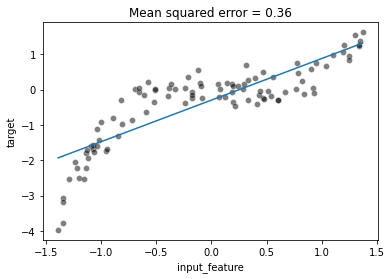

In [108]:
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

### 1. choose a model that can natively deal with non-linearity.

In [109]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=3).fit(data, target)
target_predicted = tree.predict(data)
mse = mean_squared_error(target, target_predicted)

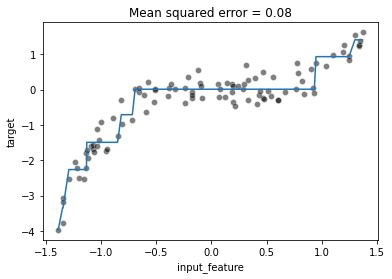

In [110]:
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

### 2. engineer a richer set of features by including expert knowledge which can be directly used by a simple linear model

linear_model이 어째서 이렇게 그려지는거지?????

In [116]:
data_expended = np.concatenate([data,data**2, data**3], axis=1)

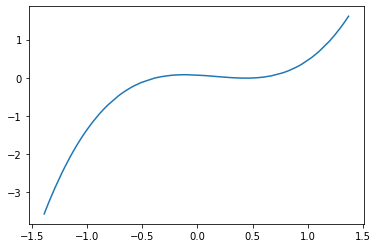

In [117]:
linear_regression.fit(data_expended, target)
target_predicted = linear_regression.predict(data_expended)

plt.plot(data,target_predicted)

### 3. use a kernel to have a locally-based decision function instead of a global linear decision function.

include_bias = False => We would create a column perfectly corrlated to the intercept_ 라는데 뭔말인지..


In [118]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

poly_regression = make_pipeline(PolynomialFeatures(degree=3, include_bias=False), LinearRegression())

poly_regression.fit(data,target)
target_predicted = poly_regression.predict(data)
mse = mean_squared_error(target,target_predicted)

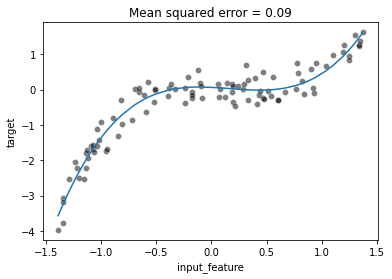

In [123]:
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

In [124]:
from sklearn.svm import SVR

svr = SVR(kernel='linear')
svr.fit(data,target)
target_predicted = svr.predict(data)
mse = mean_squared_error(target, target_predicted)

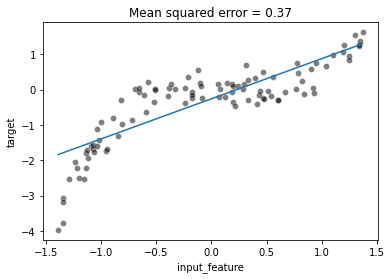

In [125]:
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

In [126]:
full_data['input_feature'].head()

0   -1.386853
1   -1.347389
2   -1.343699
3   -1.343388
4   -1.290274
Name: input_feature, dtype: float64

In [127]:
svr = SVR(kernel='poly', degree=3)
svr.fit(data,target)
target_predicted = svr.predict(data)
mse = mean_squared_error(target, target_predicted)

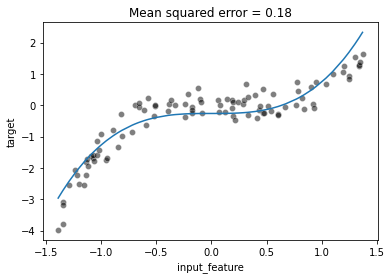

In [128]:
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

Kernel methdos such as SVR are very efficient for small to medium datasets.data

for larger datasets with n_samples >> 10_000, it is often computationally more efficient to perform explict feature expension using ``PolynomialFeatures`` or other non-linear transformers such as ``KBinsDiscretizer or Nystroem``

In [132]:
from sklearn.preprocessing import KBinsDiscretizer

binned_regression = make_pipeline(KBinsDiscretizer(n_bins=8), LinearRegression())

binned_regression.fit(data, target)
target_predicted = binned_regression.predict(data)

mse = mean_squared_error(target, target_predicted)


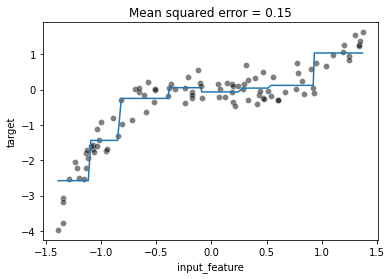

In [133]:
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

In [135]:
from sklearn.kernel_approximation import Nystroem

Nystroem_regession = make_pipeline(Nystroem(n_components=5), LinearRegression())

Nystroem_regession.fit(data,target)

target_predicted = Nystroem_regession.predict(data)

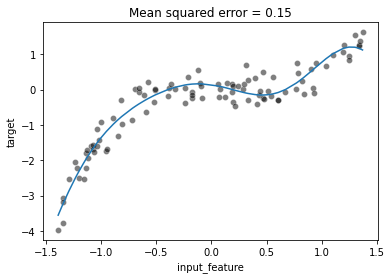

In [136]:
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

### Exercise 

In [137]:
from sklearn.datasets import fetch_california_housing

data,target = fetch_california_housing(as_frame=True, return_X_y=True)
target*=100

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

model = LinearRegression()
cv_model = cross_validate(model,data,target,cv=10, scoring='neg_mean_absolute_error', n_jobs=-1, return_estimator= True)

<AxesSubplot:>

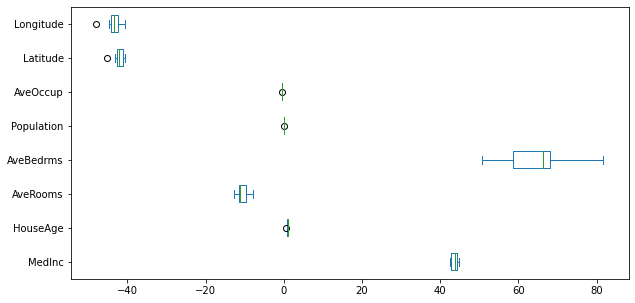

In [152]:
weight = pd.DataFrame([a.coef_ for a in cv_model['estimator']], columns=data.columns)

weight.plot.box(vert=False, figsize=(10,5))